In [1]:
import os
import sys

import numpy as np
import scipy.io

import matplotlib.pyplot as plt

In [2]:
wd = '/home/feldheimlab/python/Auditory/stimgen/muscimol/'
file = 'BLN.txt'

def probeMap(probe='AN'):
    AN = True
    probe_map = np.array([[975,0],[875,0],[775,0],[675,0],[575,0],[475,0],[375,0],
                    [275,0],[175,0],[75,0],[0,0],[50,16],[100,20],[150,20],[200,20],
                    [250,20],[300,20],[1050,20],[1000,20],[950,20],[900,20],[850,20],
                    [800,20],[750,20],[700,20],[650,20],[600,20],[550,20],[500,20],
                    [450,20],[400,20],[350,20],[300,-20],[350,-20],[400,-20],[450,-20],
                    [500,-20],[550,-20],[600,-20],[650,-20],[700,-20],[750,-20],[800,-20],
                    [850,-20],[900,-20],[950,-20],[1000,-20],[1050,-20],[250,-20],[200,-20],
                    [150,-20],[100,-20],[50,-16],[25,0],[125,0],[225,0],[325,0],[425,0],
                    [525,0],[625,0],[725,0],[825,0],[925,0],[1025,0],[1025,200],[925,200],
                    [825,200],[725,200],[625,200],[525,200],[425,200],[325,200],[225,200],
                    [125,200],[25,200],[50,184],[100,180],[150,180],[200,180],[250,180],
                    [1050,180],[1000,180],[950,180],[900,180],[850,180],[800,180],[750,180],
                    [700,180],[650,180],[600,180],[550,180],[500,180],[450,180],[400,180],
                    [350,180],[300,180],[350,220],[400,220],[450,220],[500,220],[550,220],
                    [600,220],[650,220],[700,220],[750,220],[800,220],[850,220],[900,220],
                    [950,220],[1000,220],[1050,220],[300,220],[250,220],[200,220],[150,220],
                    [100,220],[50,216],[0,200],[75,200],[175,200],[275,200],[375,200],
                    [475,200],[575,200],[675,200],[775,200],[875,200],[975,200],[1025,400],
                    [925,400],[825,400],[725,400],[625,400],[525,400],[425,400],[325,400],
                    [225,400],[125,400],[25,400],[50,384],[100,380],[150,380],[200,380],
                    [250,380],[1050,380],[1000,380],[950,380],[900,380],[850,380],[800,380],
                    [750,380],[700,380],[650,380],[600,380],[550,380],[500,380],[450,380],
                    [400,380],[350,380],[300,380],[350,420],[400,420],[450,420],[500,420],
                    [550,420],[600,420],[650,420],[700,420],[750,420],[800,420],[850,420],
                    [900,420],[950,420],[1000,420],[1050,420],[300,420],[250,420],[200,420],
                    [150,420],[100,420],[50,416],[0,400],[75,400],[175,400],[275,400],
                    [375,400],[475,400],[575,400],[675,400],[775,400],[875,400],[975,400],
                    [975,600],[875,600],[775,600],[675,600],[575,600],[475,600],[375,600],
                    [275,600],[175,600],[75,600],[0,600],[50,616],[100,620],[150,620],
                    [200,620],[250,620],[300,620],[1050,620],[1000,620],[950,620],[900,620],
                    [850,620],[800,620],[750,620],[700,620],[650,620],[600,620],[550,620],
                    [500,620],[450,620],[400,620],[350,620],[300,580],[350,580],[400,580],
                    [450,580],[500,580],[550,580],[600,580],[650,580],[700,580],[750,580],
                    [800,580],[850,580],[900,580],[950,580],[1000,580],[1050,580],[250,580],
                    [200,580],[150,580],[100,580],[50,584],[25,600],[125,600],[225,600],
                    [325,600],[425,600],[525,600],[625,600],[725,600],[825,600],[925,600],
                    [1025,600]])

    if probe=='AN':
        for i in range(4):
            probe_map[64*(i):(64*(i+1)),1]+=(i*200)
            
    return probe_map


def readStimFile(wd, file):   
    lines = []
    n = 0
    with open(os.path.join(wd, file)) as f:
        [lines.append(line.strip()) for line in f.readlines()]
        
    print('Reading file: \n\t', os.path.join(wd, file))
    print(lines[0])
    
    #get the different stimulations
    stims = lines[3]
    num_stim = []
    n0 = 0
    for n, li in enumerate(stims):
        if li == ' ':
            try:
                num_stim.append(int(stims[n0:n]))
            except Exception as e:
                e
            n0=n
    num_stim.append(int(stims[n0:]))
    num_stim = np.array(num_stim)
    
    #get the order of stimulations
    for l, line in enumerate(lines[4:]):
        if l == 0:
            first = []
            n0 = 0
            for n, li in enumerate(line):
                if li == ' ':
                    try:
                        first.append(int(line[n0:n]))
                    except Exception as e:
                        e
                    n0=n
            first.append(int(line[n0:]))
            stims = np.zeros((len(lines[4:]), len(first)))
            stims[0] = np.array(first) 
        else:
            n0 = 0
            i = 0
            for n, li in enumerate(line):
                if li == ' ':
                    try:
                        stims[l, i] = int(line[n0:n])
                        i+=1
                    except Exception as e:
                        e
                    n0=n      
            stims[l, i] = int(line[n0:])
            
    return stims, num_stim




stims, num_stim = readStimFile(wd, file)
print('Number of stimulations')
print(num_stim)
print('Stimulations order')
print(stims)

Reading file: 
	 /home/feldheimlab/python/Auditory/stimgen/muscimol/BLN.txt
Auditory stimulus definition file, version 2
Number of stimulations
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Stimulations order
[[ 1.  6.  8.  9. 14.  4.  2. 13. 10.  7. 11.  3.  0.  5. 12.]
 [ 1.  7.  4. 14. 10. 12.  2. 13.  9.  8.  3. 11.  0.  5.  6.]
 [12.  8.  9.  0.  5. 14. 11.  6.  3. 10.  2.  4.  7. 13.  1.]
 [10.  1.  9.  5.  2.  0.  8.  3. 13.  6. 14.  7. 11. 12.  4.]
 [ 7.  0. 13.  2.  9.  4.  8. 12. 10.  3.  6. 11.  5.  1. 14.]
 [ 9.  3.  1.  0.  4. 14.  5. 12.  7.  2.  8. 11.  6. 13. 10.]
 [ 7.  6.  1. 14. 13.  5. 11.  3. 10.  9.  8. 12.  2.  0.  4.]
 [ 9. 14.  3. 11. 13. 12. 10.  0.  4.  2.  1.  5.  6.  8.  7.]
 [ 9.  7. 12. 11.  4.  5. 13.  2.  1.  6.  0. 10. 14.  8.  3.]
 [ 7. 12.  1.  6.  2. 11.  5.  8.  3. 13. 14.  9. 10.  0.  4.]
 [ 0.  7.  9.  3.  5.  2. 14.  8. 11. 12. 13.  4.  6. 10.  1.]
 [13.  8. 12.  1. 10. 14. 11.  9.  7.  4.  0.  3.  6.  5.  2.]
 [10.  1. 14.  4. 13.  8.  2. 12. 

In [63]:
wd = '/media/feldheimlab/Seagate Expansion Drive/processedL5/2023-02-03-0/data001,data002,data003,data004,data005,data006,data007,data008,data009,data010,data011/'

asdf = scipy.io.loadmat(wd + 'asdf.mat')['asdf_raw']
IDs = scipy.io.loadmat(wd + 'asdf.mat')['IDs']
location = scipy.io.loadmat(wd + 'asdf.mat')['location']
basicinfo  = scipy.io.loadmat(wd + 'basicinfo.mat')
eisummary = scipy.io.loadmat(wd + 'eisummary.mat')
xy = scipy.io.loadmat(wd + 'xy.mat')
datasets = np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])
rise = np.squeeze(scipy.io.loadmat(wd + 'ttlTimes.mat')['ttlTimes'])





In [4]:
scipy.io.loadmat(wd + 'ttlTimes.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Feb 14 00:03:42 2023',
 '__version__': '1.0',
 '__globals__': [],
 'ttlTimes': array([[  661012.25],
        [  662011.3 ],
        [  663010.35],
        ...,
        [15191177.4 ],
        [15192177.4 ],
        [15193180.5 ]])}

In [7]:
segmentseparations =  np.concatenate([[0],np.squeeze(scipy.io.loadmat(wd + 'segmentlengths.mat')['segmentseparations'])])

In [67]:
def patternGen(asdf, ttls, stims, num_stim, ttl_trig,  window=0, force=False):
    n_trial, n_stim = stims.shape
    print('Trials: ', n_trial, '\nStimulations: ', n_stim)
    if window == 0:
        window=[0,1000]
    n_neurons = asdf.shape[0]
    n_ttls = ttls.shape[0]
    print('Nuerons:', n_neurons)
    pattern = []
    print('TTLs: ', n_ttls, '\nPresentations: ', n_trial*n_stim)
    if n_ttls != n_trial*n_stim:
        print('\nNumber of stimulations do not match the number of ttls captured')
        assert force, 'If you would like to proceed, assumptions of some stimuli will occur. Use the force parameter to continue.'
        print('\t{} seconds of recording'.format(np.round(ttls[-1]-ttl_trig, 2)))
        print('\tFORCED APPROX OF TTLS WILL HAPPEN!')
    
    #Make ttl array in the same format as the stims array (this step makes indexin easy)
    ttlarray = np.zeros((n_trial, n_stim))
    lastttl = ttls[0]
    stim = 0
    trial = 0
    i =0
    for t, ttl in enumerate(ttls):
        if force:
            if ((ttl-lastttl) > 1500):#THIS IS ASSUMING LAGER THAN 1.5sec WILL BE APPROXIMATED! (ONLY WHEN FORCED)
                i+=1
                ttlarray[trial, stim] = lastttl+1000
                stim = (stim+1) % n_stim
                if stim == 0:
                    trial = (trial+1) % n_trial
               
                if ((ttl-lastttl) > 2500):
                    ttlarray[trial, stim] = lastttl+2000
                    stim = (stim+1) % n_stim
                    if stim == 0:
                        trial = (trial+1) % n_trial
                        
                assert ((ttl-lastttl) < 3500), 'Too complicated a fix' 
                        
                ttlarray[trial, stim] = ttl
            else:
                ttlarray[trial, stim] = ttl
        else:
            ttlarray[trial, stim] = ttl
        stim = (stim+1) % n_stim
        if stim == 0:
            trial = (trial+1) % n_trial
        lastttl = ttl
        
    if force:
        print('\tUpdated TTLs: ', np.sum(ttlarray!=0))
    pattern = [[],]
    for n in np.arange(n_neurons):
        pattern[0].append([])
        for s in np.arange(n_stim):
            pattern[0][n].append([])
            for t in np.arange(n_trial):
                pattern[0][n][s].append([])
    print(len(pattern), len(pattern[0]), len(pattern[0][0]), len(pattern[0][0][0]))
    
    for n, neuron in enumerate(asdf):
        neuron = (neuron[0]-segmentseparations[4])/1000
        for s, stim in enumerate(num_stim):
#             if n==0:
#                 print(stim)
            currentstim = ttlarray[stims == stim]
            for t, trial in enumerate(currentstim):
#                 if (n == 0)&(s==0):
#                     print(trial)
                pattern[0][n][s][t] = neuron[(neuron>trial)&(neuron<(trial+window[1]))]-trial

#         for neuron in asdf:
#             neuron = neuron[0][0]
#             for t, stim in enumerate(currentstim):
#                 for ttl in stim:
#                     neuro = neuron[0][0][neurons[(ttl)&(ttl )]
# #                     pattern.append(neur[neur])


    return pattern, ttlarray

def getTTLseg(seg, ttls):
    print(segmentseparations[seg+1])
    return ttls[(ttls<datasets[seg+1])&(ttls>datasets[seg])]

seg = 4
ttls = getTTLseg(seg = seg, ttls=rise)
pattern, ttlarray = patternGen(asdf, ttls, stims, num_stim, datasets[seg], force=True)



5849919.999999999
Trials:  30 
Stimulations:  15
Nuerons: 199
TTLs:  416 
Presentations:  450

Number of stimulations do not match the number of ttls captured
	450154.85 seconds of recording
	FORCED APPROX OF TTLS WILL HAPPEN!
	Updated TTLs:  450
1 199 15 30


In [68]:
maxnum=0

print(len(pattern), len(pattern[0]), len(pattern[0][0]), len(pattern[0][0][0]))


values = 0
for i in range(len(pattern[0])):
    for j in range(len(pattern[0][0])):
        for k in range(len(pattern[0][0][0])):
            if len(pattern[0][i][j][k]) > 0:
                cur = np.max(pattern[0][i][j][k])
                values += len(pattern[0][i][j][k])
                if cur > maxnum:
                    maxnum=cur
print(maxnum, values)     

1 199 15 30
0 0


In [160]:
ttls = np.squeeze(scipy.io.loadmat(wd + 'ttlTimes.mat')['ttlTimes'])/1000
print(ttlTimes)
fixed = ttlarray.reshape(ttlarray.size)
seg = 9
fixedttls = np.concatenate([ttls[(ttls<datasets[seg])], fixed[1:], ttls[(ttls>datasets[seg+1])]])*1000


print(fixedttls[:3], fixedttls[-3:],)
scipy.io.savemat(wd + 'fixedttlTimes.mat', {'ttlTimes':fixedttls})


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Feb  1 17:58:58 2023', '__version__': '1.0', '__globals__': [], 'ttlTimes': array([[  638810.  ],
       [  638932.55],
       [  639944.55],
       ...,
       [15200961.9 ],
       [15201960.9 ],
       [15202966.  ]])}
[661012.25 662011.3  663010.35] [15191177.4 15192177.4 15193180.5]


In [162]:
segttls = scipy.io.loadmat(wd + 'segttls.mat')
print(segttls['segttls'].dtype)
segttls['segttls'][0][4] = fixed[:,None]*1000
segttls['segttls'].dtype


scipy.io.savemat(wd + 'segttls.mat', {'segttls':segttls})



object


In [132]:
three = np.array([[np.array([[2, 2, 2]]), np.array([[3, 3]])]])

NameError: name 'array' is not defined

In [10]:
import os
import sys
sys.path.append('/home/feldheimlab/Desktop/population encoding data')
import numpy as np
import pandas as pd

from Experiment import *
timerange = 200
timeBinSz = 5
n_neurons = asdf.shape[0]
data_mat2 = patternToMatrix(pattern[0], timerange, timeBinSz, np.arange(n_neurons), norm=False, count=True)    


TypeError: list indices must be integers or slices, not tuple

[ 1. 15. 30.]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
0.47634999999991123
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


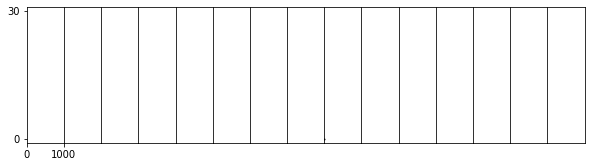

In [37]:
def PatternRaster(pattern2d, timerange=None):
    # make/visualize a raster plot based on the data given
    
    ns = np.zeros(3)
    ns[0] = int(1)
    ns[1] = len(pattern2d)
    ns[2] = len(pattern2d[0])
    print(ns)
    if timerange is None:
        maxtime = 1000
        mintime = 0
    elif not isinstance(timerange, list):
        mintime = 0
        maxtime = timerange
    elif len(timerange) == 1:
        mintime = 0
        maxtime = timerange[0]
    elif len(timerange)==2:
        mintime = timerange[0]
        maxtime = timerange[1]
        
    dur = maxtime - mintime
    
    fig, axs = plt.subplots(int(ns[0]), int(ns[1]), figsize=(10,2.5))
    
    xpos = int(0)
    x = int(0)
    for y in np.arange(ns[1]):
        y = int(y)
        for t in np.arange(ns[2]):
            t = int(t)
            try:
                xs = np.squeeze(pattern2d[y][t])
                print(xs)
                try:
                    ys = np.ones(xs.shape)*t
                except:
                    ys = np.ones(xs.shape[0])*t
            except Exception as e:
                print(e)
                xs = np.nan
                ys = np.nan
            if np.isnan(xs).any(): continue
            axs[y].scatter(xs, ys, s=1, c='k')
            xs = np.nan
        axs[y].set_yticks([])
        axs[y].set_xticks([])
        axs[y].set_xlim([mintime, maxtime])
        axs[y].set_ylim([-1, ns[2]+1])
    axs[0].set_yticks([0, ns[2]])
    axs[0].set_xticks([mintime, maxtime])
    axs[0].set_xticklabels([0, dur])
    plt.subplots_adjust(wspace=0, hspace=0)
    # savedir = '/media/ackmanadmin/BrianMullen/pop_encoding_fig/'
    # plt.savefig(savedir + 'raster_example.png', dpi=300)
    plt.show()


PatternRaster(pattern2d=pattern[0][4])